In [9]:

import zipfile
import os
import pandas as pd

# Ruta del archivo ZIP
zip_path = r"C:\Users\MAYRA ROCIO\Downloads\Arboles.zip"
extract_folder = r"C:\Users\MAYRA ROCIO\Downloads\Arboles"  # Carpeta donde extraeremos el archivo

# Verificar si el archivo ZIP existe
if os.path.exists(zip_path):
    # Extraer el archivo ZIP
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print(f"Archivo extraído en: {extract_folder}")

    # Ruta del archivo CSV extraído
    csv_path = os.path.join(extract_folder, "cjs.csv")

    # Verificar si el archivo CSV existe después de la extracción
    if os.path.exists(csv_path):
        print(f"Archivo encontrado: {csv_path}. Cargando datos...")
        df = pd.read_csv(csv_path)
        print("Datos cargados correctamente.")
        print(df.head())  # Muestra las primeras filas del archivo
    else:
        print(f"Error: No se encontró el archivo 'cjs.csv' en la ruta {csv_path}")
else:
    print(f"Error: El archivo ZIP no se encuentra en la ruta especificada: {zip_path}")


Archivo extraído en: C:\Users\MAYRA ROCIO\Downloads\Arboles
Archivo encontrado: C:\Users\MAYRA ROCIO\Downloads\Arboles\cjs.csv. Cargando datos...
Datos cargados correctamente.
   N       TR TREE BR    TL  IN  INTERNODE_1 INTERNODE_2 INTERNODE_3  \
0  1  control  G28  A  75.0  15          1.0         2.3         7.4   
1  2  control  G28  B  18.0   7          0.7         1.3         4.0   
2  3  control  G28  C  46.0  11          0.5         1.0         4.3   
3  4  control  G28  C  16.0   8          0.5         1.2         3.5   
4  5  control  G28  D  56.0  16          0.5         1.0         3.5   

  INTERNODE_4  ... INTERNODE_20 INTERNODE_21 INTERNODE_22 INTERNODE_23  \
0         8.6  ...            ?            ?            ?            ?   
1         5.2  ...            ?            ?            ?            ?   
2         8.8  ...            ?            ?            ?            ?   
3         4.2  ...            ?            ?            ?            ?   
4         8.2  ...   

In [10]:
# 1. Análisis Exploratorio de Datos (EDA)
print("### Primeras filas del DataFrame:")
print(df.head())  # Muestra las primeras 5 filas del dataset

print("\n### Estadísticas descriptivas:")
print(df.describe())  # Estadísticas básicas: media, std, min, max

print("\n### Información del DataFrame (tipos de datos y valores nulos):")
print(df.info())  # Información general del DataFrame

print("\n### Recuento de valores nulos:")
print(df.isnull().sum())  # Recuento de valores nulos en cada columna


### Primeras filas del DataFrame:
   N       TR TREE BR    TL  IN  INTERNODE_1 INTERNODE_2 INTERNODE_3  \
0  1  control  G28  A  75.0  15          1.0         2.3         7.4   
1  2  control  G28  B  18.0   7          0.7         1.3         4.0   
2  3  control  G28  C  46.0  11          0.5         1.0         4.3   
3  4  control  G28  C  16.0   8          0.5         1.2         3.5   
4  5  control  G28  D  56.0  16          0.5         1.0         3.5   

  INTERNODE_4  ... INTERNODE_20 INTERNODE_21 INTERNODE_22 INTERNODE_23  \
0         8.6  ...            ?            ?            ?            ?   
1         5.2  ...            ?            ?            ?            ?   
2         8.8  ...            ?            ?            ?            ?   
3         4.2  ...            ?            ?            ?            ?   
4         8.2  ...            ?            ?            ?            ?   

  INTERNODE_24 INTERNODE_25 INTERNODE_26 INTERNODE_27 INTERNODE_28  \
0            ?    

### Histograma de todas las columnas numéricas:


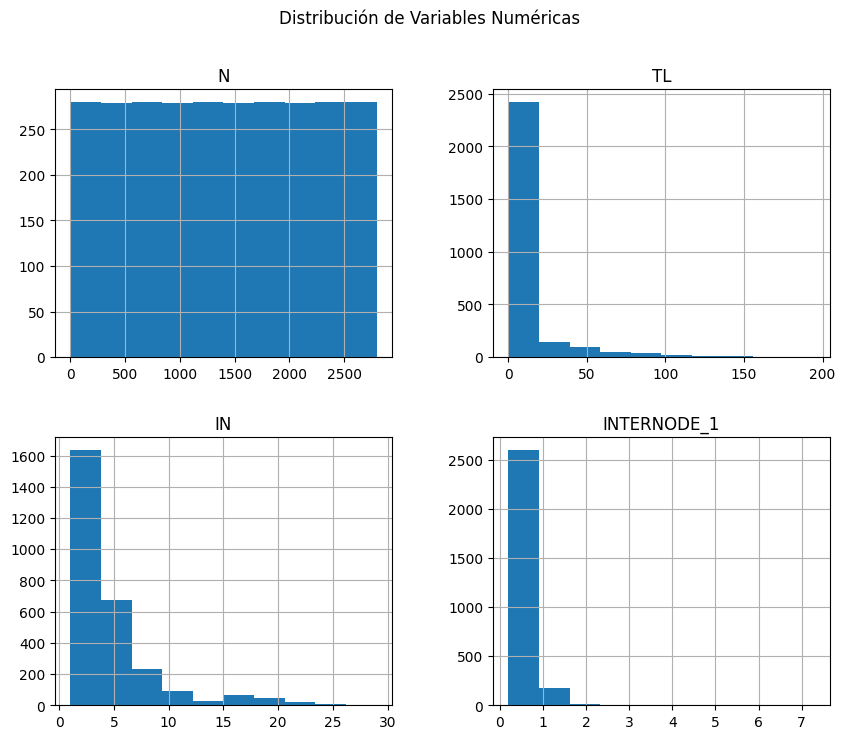

### Boxplot de todas las columnas numéricas:


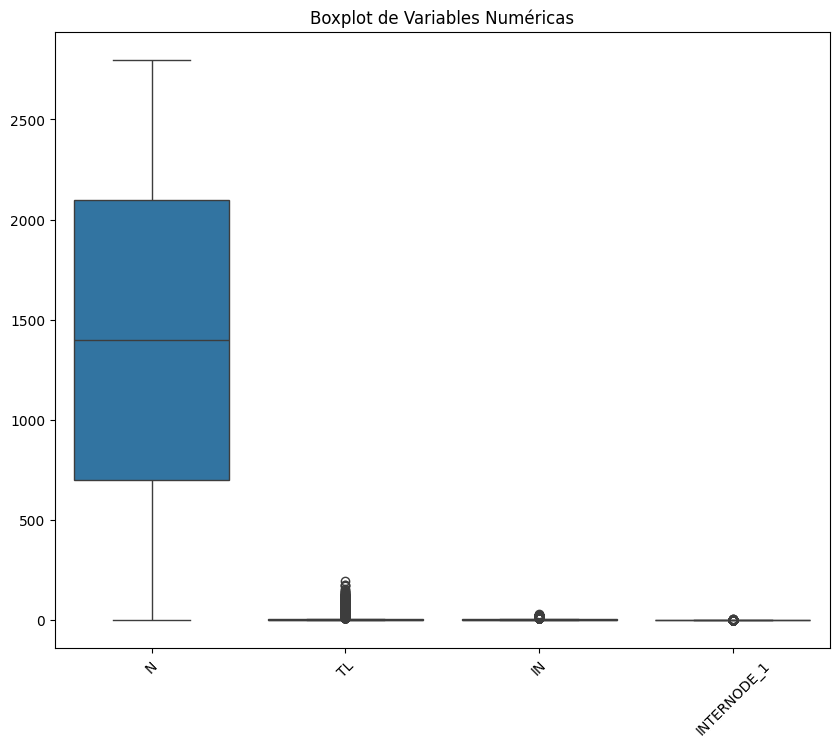

In [11]:
# 2. Visualización de la distribución de los datos
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para todas las columnas numéricas
print("### Histograma de todas las columnas numéricas:")
df.hist(figsize=(10, 8))
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

# Boxplot para detectar outliers (valores atípicos)
print("### Boxplot de todas las columnas numéricas:")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title("Boxplot de Variables Numéricas")
plt.xticks(rotation=45)
plt.show()


### Mapa de Calor de Correlación entre Variables Numéricas:


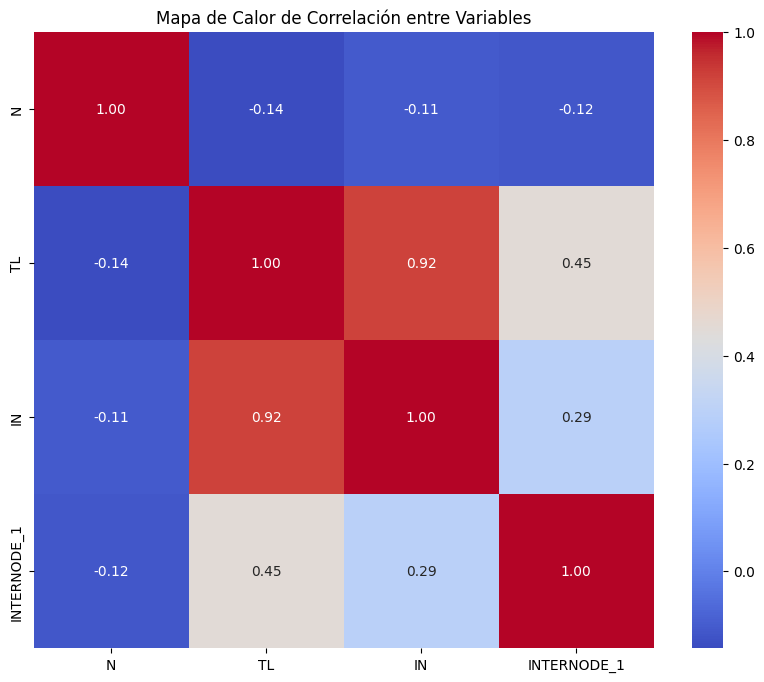

In [13]:
# 3. Correlación entre Variables - Solo columnas numéricas
# Seleccionamos solo las columnas numéricas
df_numeric = df.select_dtypes(include=[float, int])  # Solo columnas numéricas

print("### Mapa de Calor de Correlación entre Variables Numéricas:")
# Crear un mapa de calor de correlación entre las columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación entre Variables")
plt.show()


### Recuento de valores nulos:
N               0
TR              0
TREE            0
BR              0
TL              0
IN              0
INTERNODE_1     0
INTERNODE_2     0
INTERNODE_3     0
INTERNODE_4     0
INTERNODE_5     0
INTERNODE_6     0
INTERNODE_7     0
INTERNODE_8     0
INTERNODE_9     0
INTERNODE_10    0
INTERNODE_11    0
INTERNODE_12    0
INTERNODE_13    0
INTERNODE_14    0
INTERNODE_15    0
INTERNODE_16    0
INTERNODE_17    0
INTERNODE_18    0
INTERNODE_19    0
INTERNODE_20    0
INTERNODE_21    0
INTERNODE_22    0
INTERNODE_23    0
INTERNODE_24    0
INTERNODE_25    0
INTERNODE_26    0
INTERNODE_27    0
INTERNODE_28    0
INTERNODE_29    0
dtype: int64
### Boxplot para detectar outliers:


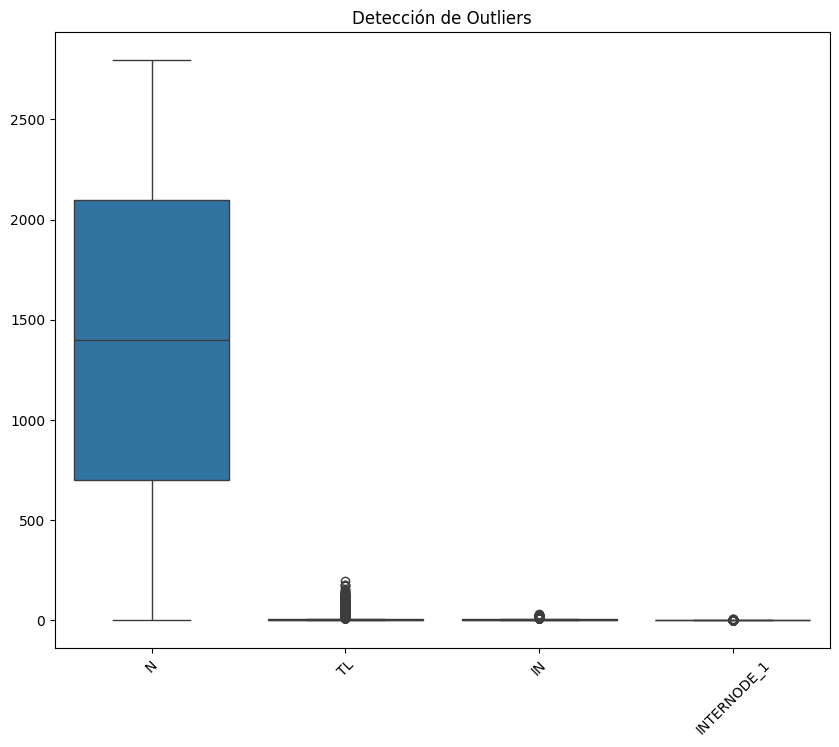

In [14]:
# 4. Análisis de valores nulos y outliers
print("### Recuento de valores nulos:")
print(df.isnull().sum())  # Ver si hay valores nulos

# 4.1 Detección de outliers con un boxplot para cada columna
print("### Boxplot para detectar outliers:")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title("Detección de Outliers")
plt.xticks(rotation=45)
plt.show()


In [15]:
# 5. Análisis de Series Temporales (si tienes columnas de fecha)
# Suponiendo que tienes una columna 'fecha' que contiene fechas en formato 'datetime'

if 'fecha' in df.columns:  # Asegurarse de que la columna 'fecha' exista
    df['fecha'] = pd.to_datetime(df['fecha'])  # Convertir a tipo datetime
    df.set_index('fecha', inplace=True)  # Establecer la columna 'fecha' como índice

    print("### Análisis de series temporales:")
    df.resample('M').sum()['valor'].plot(figsize=(10, 6))  # Sumamos por mes
    plt.title("Serie Temporal de 'valor' por mes")
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.show()
else:
    print("No se encontró una columna de fecha en el DataFrame.")


No se encontró una columna de fecha en el DataFrame.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Seleccionar las columnas numéricas para las características (X) y la variable objetivo (y)
X = df[['N', 'INTERNODE_1']]  # Características, puedes agregar más columnas si lo deseas
y = df['TL']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")



Error Cuadrático Medio (MSE): 569.550182791686


In [24]:
# Mostrar las columnas del DataFrame después de seleccionar solo las columnas numéricas
print(df_numeric.columns)



Index(['N', 'TL', 'IN', 'INTERNODE_1'], dtype='object')


In [25]:
# Evaluar el modelo con R² (coeficiente de determinación)
r2_score = model.score(X_test, y_test)
print(f"R² del modelo: {r2_score}")


R² del modelo: 0.11952813243958293


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred_rf = model_rf.predict(X_test)

# Evaluar el modelo con R²
r2_rf = model_rf.score(X_test, y_test)
print(f"R² del modelo Random Forest: {r2_rf}")


R² del modelo Random Forest: 0.21246756677554846


In [27]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model_rf = RandomForestRegressor(random_state=42)

# Definir los parámetros para la búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV para encontrar la mejor combinación de parámetros
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
r2_best = best_model.score(X_test, y_test)
print(f"R² del mejor modelo: {r2_best}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
R² del mejor modelo: 0.25647486914081974
